In [1]:
# generate random noise numpy
import numpy as np

In [2]:
noise_level = 0.5
random_noise = np.random.rand(10, 1, 184) * noise_level
# random_noise = np.random.normal(loc=0, scale=noise_level, size=(10, 1, 184))

In [3]:
random_noise.shape

(10, 1, 184)

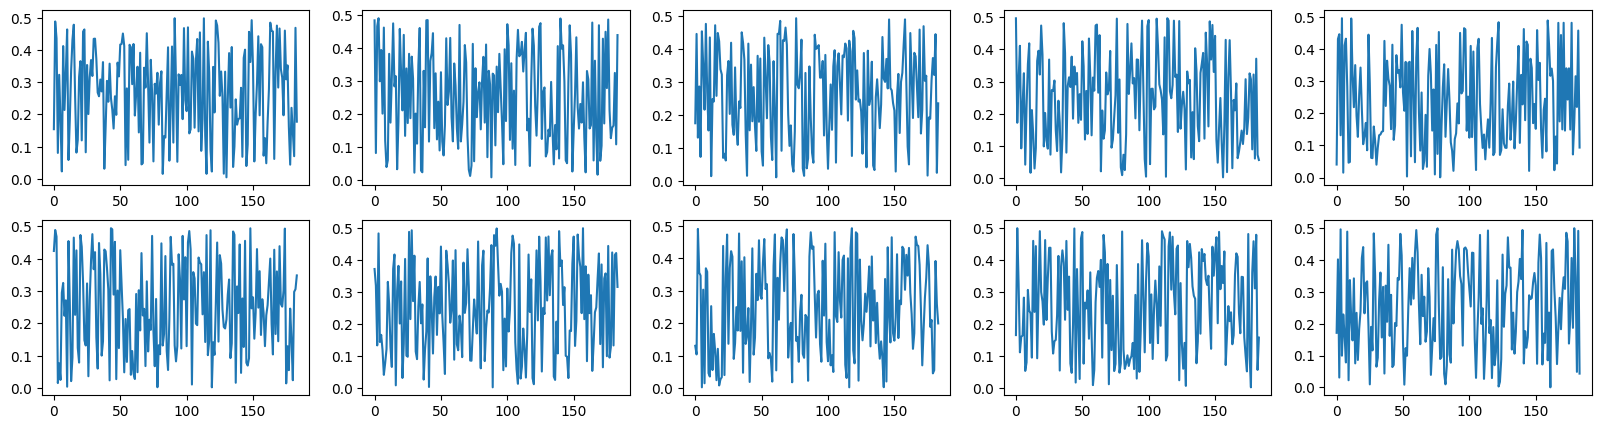

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20,5))
for i in range(2):
    for j in range(5):
        axs[i, j].plot(random_noise[i*5+j][0][:])

In [5]:
# Set the desired noise levels
num_signals, signal_length = 10, 184
clean_ecg_signals = np.random.rand(num_signals, signal_length) 

thermal_noise_level = 0.1
electrode_noise_level = 0.2
motion_artifact_level = 0.3
emg_noise_level = 0.4

# Generate and add thermal noise (white noise)
thermal_noise = np.random.normal(loc=0, scale=thermal_noise_level, size=(num_signals, signal_length))

# Generate and add electrode contact noise (low-frequency drift)
t = np.linspace(0, signal_length, signal_length)
electrode_noise = electrode_noise_level * np.sin(2 * np.pi * 0.05 * t)
electrode_noise = np.tile(electrode_noise, (num_signals, 1))

# Generate and add motion artifacts (random spikes)
num_spikes = 3
spike_positions = np.random.randint(0, signal_length, (num_signals, num_spikes))
motion_artifacts = np.zeros_like(clean_ecg_signals)
for i in range(num_signals):
    for spike_pos in spike_positions[i]:
        motion_artifacts[i, spike_pos:spike_pos + 10] = motion_artifact_level

# Generate and add EMG noise (simulated as high-frequency noise)
emg_noise = np.random.normal(loc=0, scale=emg_noise_level, size=(num_signals, signal_length))
emg_noise = np.diff(emg_noise, n=2, axis=1)  # Differentiate twice to simulate high-frequency noise
emg_noise = np.pad(emg_noise, ((0, 0), (2, 0)), mode='constant')  # Pad to restore the original shape

In [6]:
def display(noise, *args):
    fig, axs = plt.subplots(1, 5, figsize=(20,3))
    for j in range(5):
        axs[j].plot(noise[j][:])
    if args:
        plt.savefig(f'./{args[0]}.pdf', format='pdf')

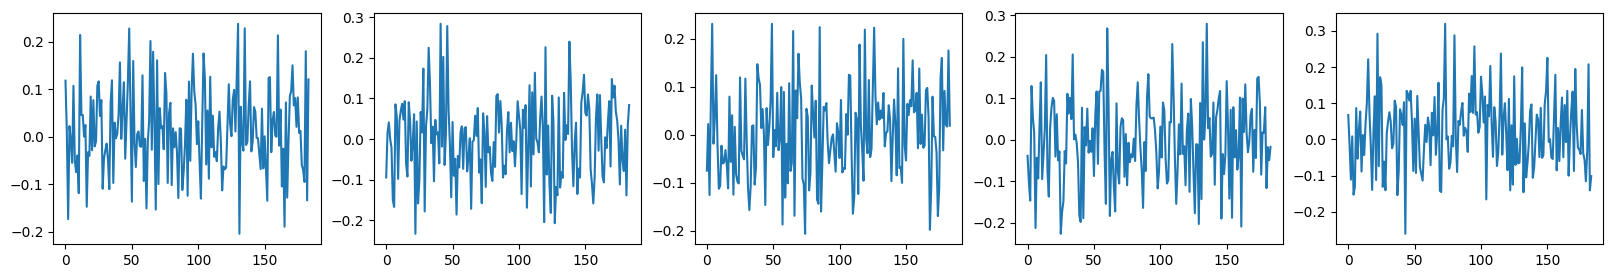

In [7]:
display(thermal_noise, 'thermal_noise')

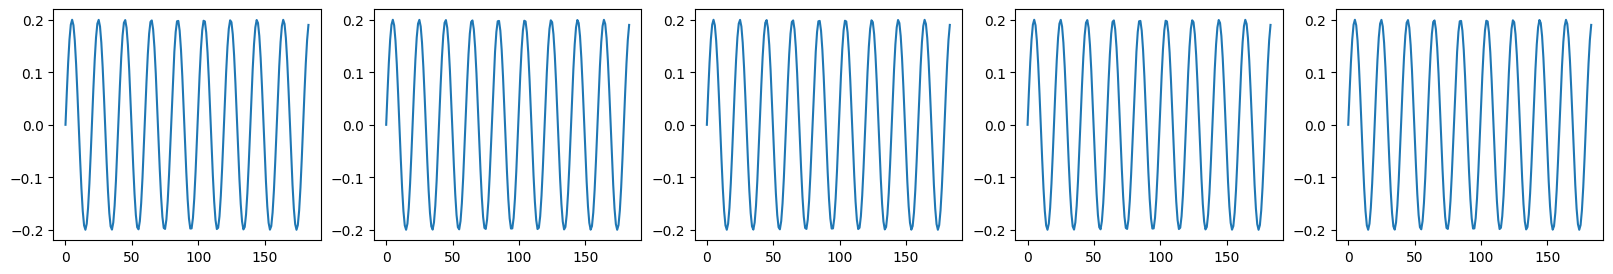

In [8]:
display(electrode_noise, 'electrode_noise')

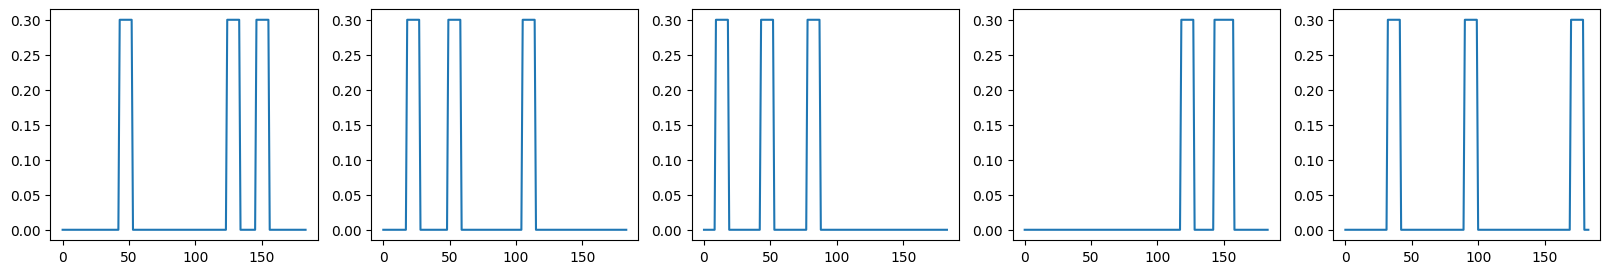

In [9]:
display(motion_artifacts, 'motion_artifacts')

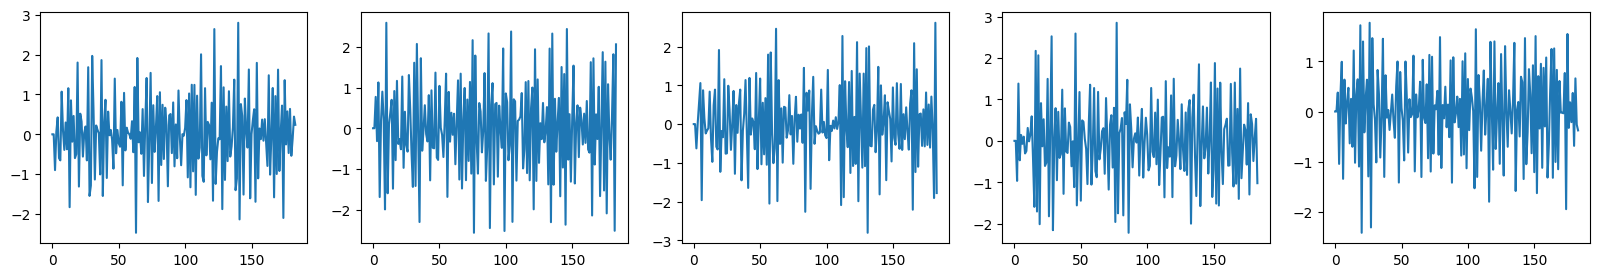

In [10]:
display(emg_noise, "emg_noise")

In [11]:
# change the motion spikes to 1-5 random times and value within the range 0.3-1

num_spikes_per_signal = np.random.randint(1, 6, num_signals)  # Randomly select the number of spikes for each signal
motion_artifacts = np.zeros_like(clean_ecg_signals)
for i in range(num_signals):
    spike_positions = np.random.randint(0, signal_length, num_spikes_per_signal[i])
    spike_amplitudes = np.random.uniform(0.3, 1, num_spikes_per_signal[i])
    for spike_pos, spike_amp in zip(spike_positions, spike_amplitudes):
        motion_artifacts[i, spike_pos:spike_pos + 5] = spike_amp


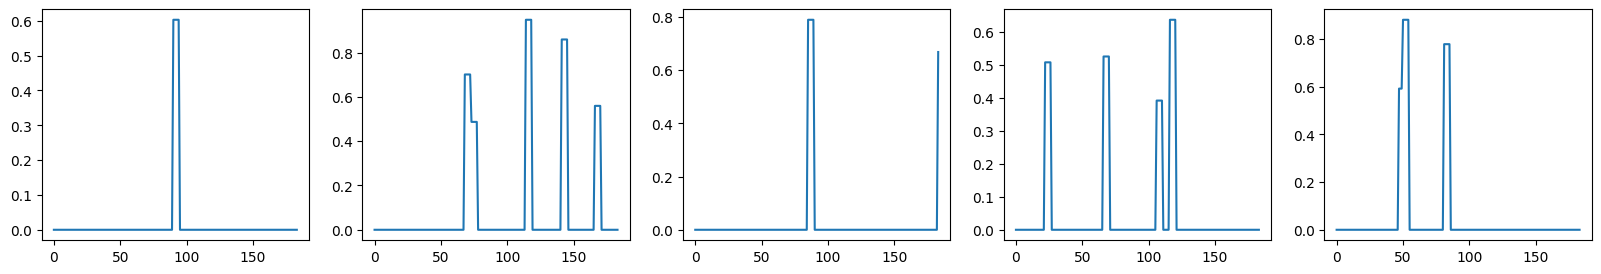

In [12]:
display(motion_artifacts,"motion_artifact")

In [3]:
!kaggle datasets download -d shayanfazeli/heartbeat -p ../
import zipfile
with zipfile.ZipFile("../heartbeat.zip", 'r') as zip_ref:
    zip_ref.extractall("../heartbeat")

 19%|███████▎                              | 19.0M/98.8M [00:00<00:02, 28.8MB/s]

 98%|█████████████████████████████████████▎| 97.0M/98.8M [00:04<00:00, 22.5MB/s]
100%|██████████████████████████████████████| 98.8M/98.8M [00:04<00:00, 23.8MB/s]


In [14]:
# read real data
import pandas as pd
data_pd = pd.read_csv('./heartbeat/mitbih_train.csv', header=None)
print(len(data_pd))

ecg_data = data_pd[data_pd[187] == 4]
ecg_data = ecg_data.iloc[:, :184].values
print(ecg_data.shape)

87554
(6431, 184)


In [15]:
sample_data = ecg_data[:10]

In [16]:
sample_data.shape

(10, 184)

In [17]:
noisy_ecg_signals = sample_data + thermal_noise + motion_artifacts

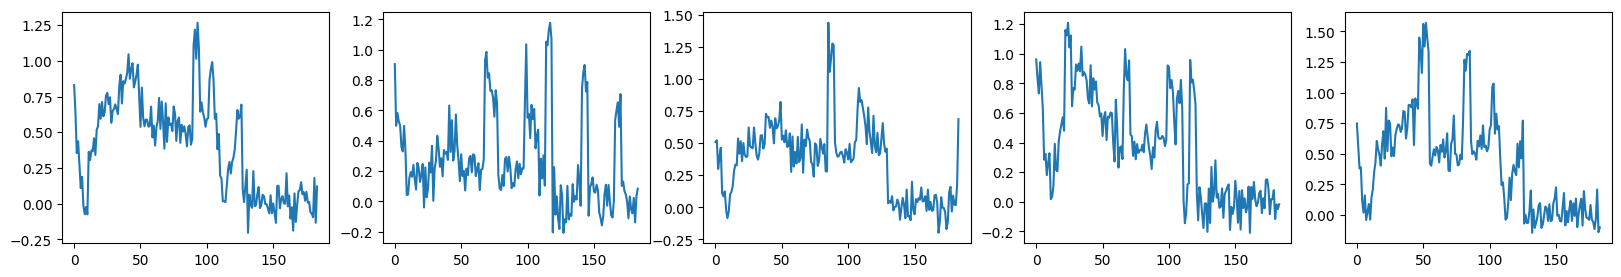

In [18]:
display(noisy_ecg_signals,"noisy_ecg_signals")

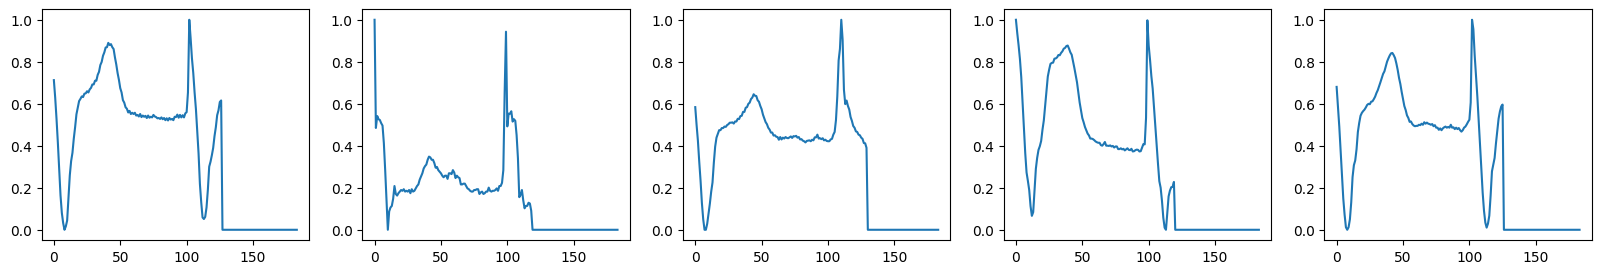

In [19]:
display(sample_data, "sample_data")

In [20]:
import numpy as np

# Assuming your original array is 'clean_ecg_signals'
# clean_ecg_signals = np.array([...])

# Get the shape of the original array
num_signals, signal_length = sample_data.shape

# Calculate the number of groups to mask (approximately 3% of the data points)
group_size_mean = (5 + 10) / 2
num_masked_groups = int(num_signals * signal_length * 0.03 / group_size_mean)

# Generate random start indices for each group
start_indices = np.random.randint(0, signal_length - 10, num_masked_groups * num_signals)

# Calculate the size of each group (5-10 timepoints)
group_sizes = np.random.randint(5, 11, num_masked_groups * num_signals)

# Create a mask numpy array with the same shape as the clean signals
mask_array = np.zeros((num_signals, signal_length), dtype=bool)

# Set the specified groups of indices to 1 (True)
for i in range(num_signals):
    for start_idx, size in zip(start_indices[i::num_signals], group_sizes[i::num_signals]):
        mask_array[i, start_idx:start_idx + size] = True


In [21]:
sample_data.shape

(10, 184)

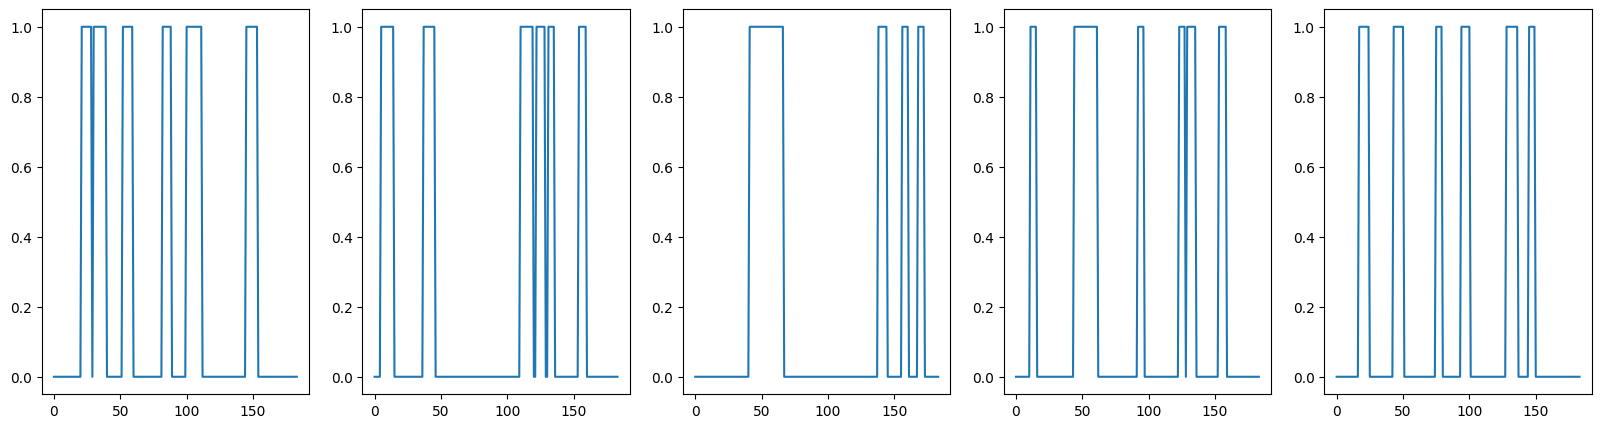

In [22]:
fig, axs = plt.subplots(1, 5, figsize=(20,5))
for i in range(5):
    axs[i].plot(mask_array[i][:])

In [23]:
masked_signals = sample_data.copy()
masked_signals[mask_array] = 0  # Or any other value you want to replace the masked data points with

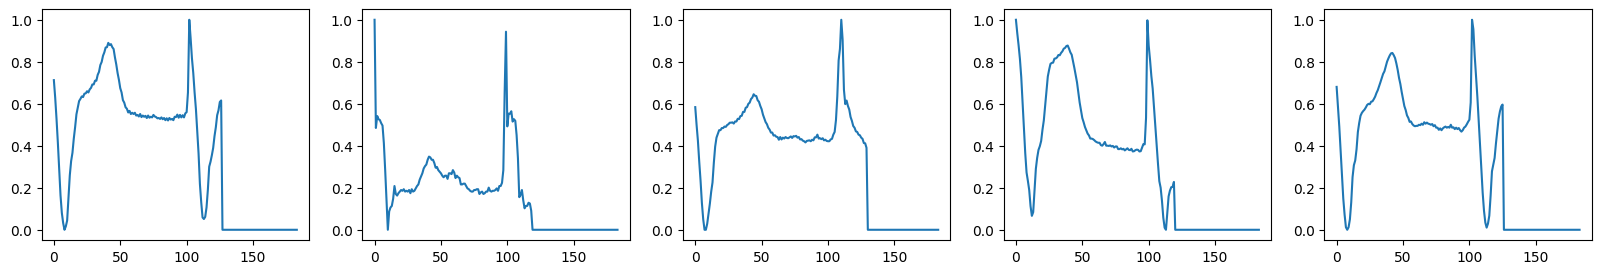

In [107]:
display(sample_data)

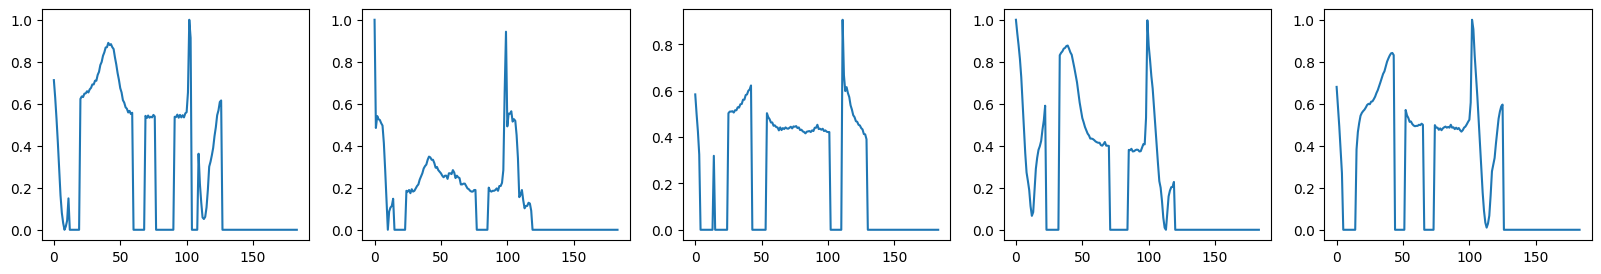

In [108]:
display(masked_signals)